In [1]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
current_dir = os.getcwd()
while os.path.basename(current_dir) != 'nets2':
    current_dir = os.path.dirname(current_dir)
    if current_dir == os.path.dirname(current_dir): 
        raise Exception("'nets2' directory not found in parent directories")
    
sys.path.insert(1, os.path.join(current_dir, 'scripts'))
sys.path.insert(1, os.path.join(current_dir, 'stella'))
from utils import *
import pickle
from scipy import stats

/home/astro/phrdhx/micromamba/envs/nets2/lib/python3.8/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /home/astro/phrdhx/.lightkurve/cache. Please move all the files in the legacy directory /home/astro/phrdhx/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
def load_predictions(file_path):
    """Load the pickle file"""
    data = []
    with open(file_path, 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f))
            except EOFError:
                break
    return data

def read(path):
    return pd.DataFrame(load_predictions(path))

In [3]:
data = pd.DataFrame(load_predictions('../s23.pkl'))

In [4]:
len(data)

219349

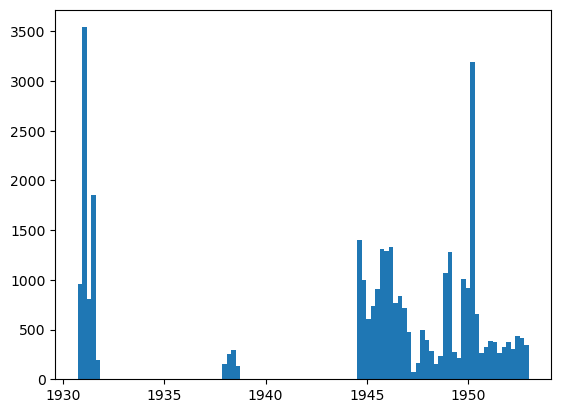

In [5]:
plt.hist(data[data.pred > 0.7].t_pred,bins=100)
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 101 but corresponding boolean dimension is 100

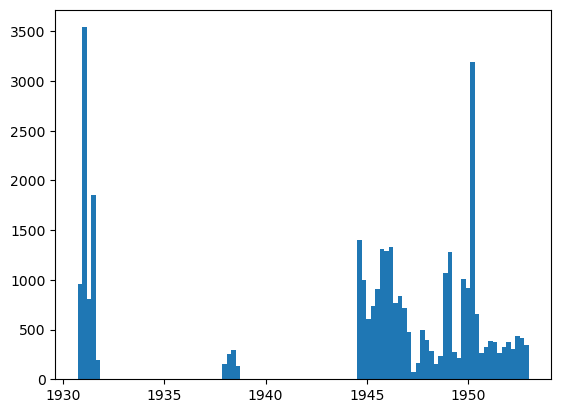

<Figure size 640x480 with 0 Axes>

In [6]:
preds = data[data.pred > 0.7].t_pred
counts, bins, _ = plt.hist(preds, bins=100)

# Calculate median and MAD of the counts
median_count = np.median(counts)
mad_count = stats.median_abs_deviation(counts)

# Define outlier threshold (e.g., 3 times MAD)
outlier_threshold = 3

# Create mask for non-outlier bins
keep_mask = np.abs(counts - median_count) <= outlier_threshold * mad_count

# Plot filtered histogram
plt.figure()
plt.hist(preds, bins=bins[:-1][keep_mask], range=(bins[keep_mask].min(), bins[keep_mask].max()))
plt.title('Filtered Histogram (Outlier Bins Removed)')
plt.xlabel('Prediction Values')
plt.ylabel('Count')
plt.show()

---

In [10]:
df = data[data.pred > 0.7].sample(20000)

### Plot common times?

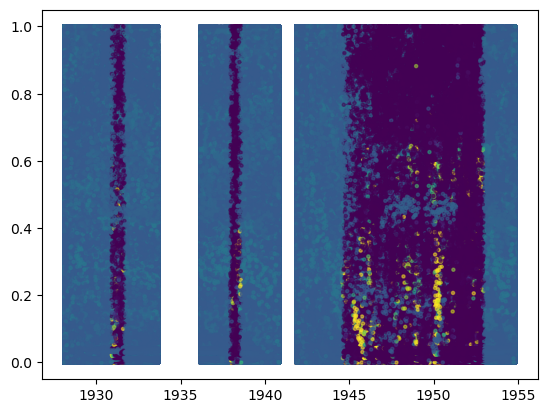

In [11]:
for i in df.index:
    time = df.loc[i].time
    flux = df.loc[i].flux
    preds = df.loc[i].predictions
    plt.scatter(time,flux,c=preds,s=5,alpha=0.5)
plt.show()

### Remove the times from the arrays and re-plot

In [13]:
counts

array([9.610e+02, 3.540e+03, 8.120e+02, 1.854e+03, 1.950e+02, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.510e+02, 2.510e+02, 2.950e+02, 1.350e+02,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 7.000e+00, 1.399e+03, 9.940e+02, 6.020e+02, 7.350e+02,
       9.120e+02, 1.307e+03, 1.289e+03, 1.332e+03, 7.640e+02, 8.400e+02,
       7.200e+02, 4.780e+02, 7.500e+01, 1.610e+02, 4.920e+02, 3.960e+02,
       2.870e+02, 1.500e+02, 2.340e+02, 1.065e+03, 

In [14]:
bins

array([1930.72260092, 1930.94531473, 1931.16802855, 1931.39074236,
       1931.61345618, 1931.83617   , 1932.05888381, 1932.28159763,
       1932.50431144, 1932.72702526, 1932.94973907, 1933.17245289,
       1933.39516671, 1933.61788052, 1933.84059434, 1934.06330815,
       1934.28602197, 1934.50873578, 1934.7314496 , 1934.95416342,
       1935.17687723, 1935.39959105, 1935.62230486, 1935.84501868,
       1936.06773249, 1936.29044631, 1936.51316013, 1936.73587394,
       1936.95858776, 1937.18130157, 1937.40401539, 1937.6267292 ,
       1937.84944302, 1938.07215684, 1938.29487065, 1938.51758447,
       1938.74029828, 1938.9630121 , 1939.18572591, 1939.40843973,
       1939.63115355, 1939.85386736, 1940.07658118, 1940.29929499,
       1940.52200881, 1940.74472262, 1940.96743644, 1941.19015026,
       1941.41286407, 1941.63557789, 1941.8582917 , 1942.08100552,
       1942.30371934, 1942.52643315, 1942.74914697, 1942.97186078,
       1943.1945746 , 1943.41728841, 1943.64000223, 1943.86271